In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
from matplotlib.ticker import FuncFormatter

In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [27]:
file1 = "서울시-공공자전거-신규가입자-1807-2206.csv"
file2 = "서울시-공공자전거-신규가입자-2207-2212.csv"
file3 = "서울시-공공자전거-신규가입자-2301-2306.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

df = pd.concat([df1, df2, df3], ignore_index=True)
df['가입일시'] = pd.to_datetime(df['가입일시'], format='%Y%m')
df['가입일시'] = df['가입일시'].dt.strftime('%Y-%m')
df.to_csv("따릉이_신규가입자_데이터.csv", index=False)


In [34]:
data = "따릉이_신규가입자_데이터.csv"
df = pd.read_csv(data)
df['신규가입자수'] = df['신규가입자수'].str.replace(',', '').astype(int)
df['가입일시'] = pd.to_datetime(df['가입일시'], format='%Y-%m')

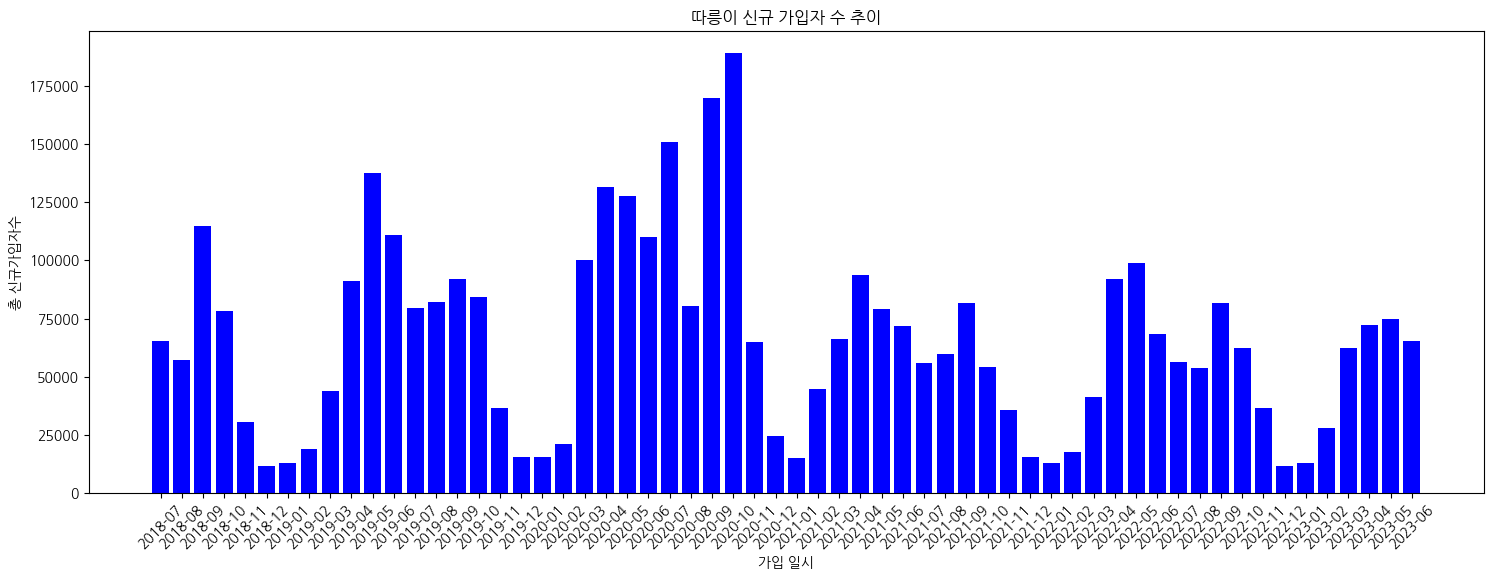

In [39]:
df = pd.read_csv(data)
df['신규가입자수'] = df['신규가입자수'].str.replace(',', '').astype(int)
total_df = df.groupby('가입일시')['신규가입자수'].sum().reset_index()

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(18, 6))
plt.bar(total_df['가입일시'], total_df['신규가입자수'], color='blue')
plt.xlabel('가입 일시')
plt.ylabel('총 신규가입자수')
plt.title('따릉이 신규 가입자 수 추이')
plt.xticks(rotation=45)
plt.show()


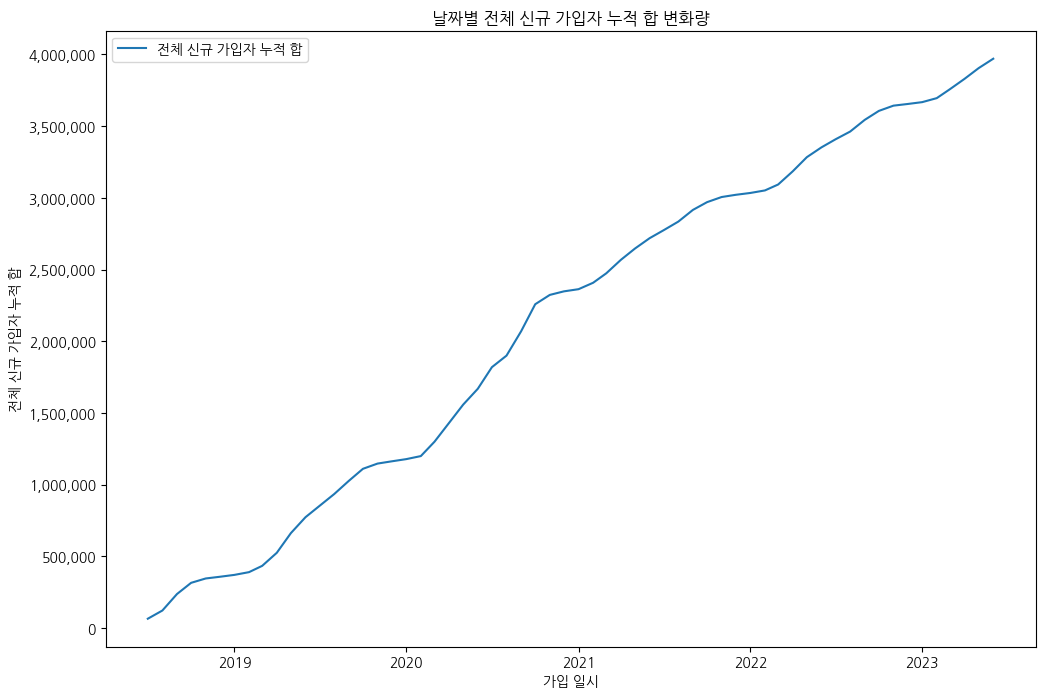

In [31]:
total_cumulative = df.groupby('가입일시')['신규가입자수'].sum().cumsum()

plt.figure(figsize=(12, 8))
plt.plot(total_cumulative.index, total_cumulative.values, label='전체 신규 가입자 누적 합')

plt.xlabel('가입 일시')
plt.ylabel('전체 신규 가입자 누적 합')
plt.title('날짜별 전체 신규 가입자 누적 합 변화량')

def format_fn(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_fn))
plt.legend()
plt.show()

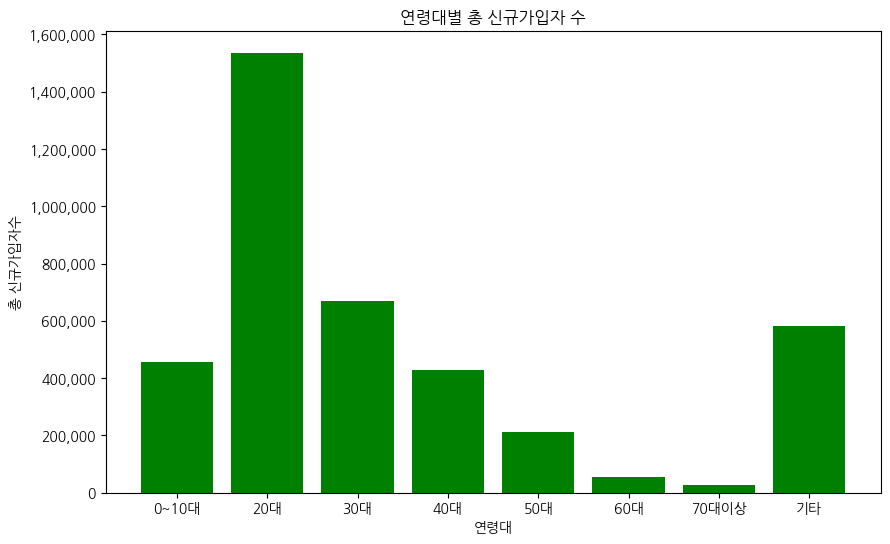

In [13]:
data = "따릉이_신규가입자_데이터.csv"
df = pd.read_csv(data)
df['가입일시'] = pd.to_datetime(df['가입일시'], format='%Y-%m')
df['연령대코드'] = df['연령대코드'].replace({'~10대': '0~10대'})
df['신규가입자수'] = df['신규가입자수'].str.replace(',', '').astype(int)
age_group_df = df.groupby('연령대코드')['신규가입자수'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(age_group_df['연령대코드'], age_group_df['신규가입자수'], color='green')
plt.xlabel('연령대')
plt.ylabel('총 신규가입자수')
plt.title('연령대별 총 신규가입자 수')

def format_fn(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_fn))
plt.show()

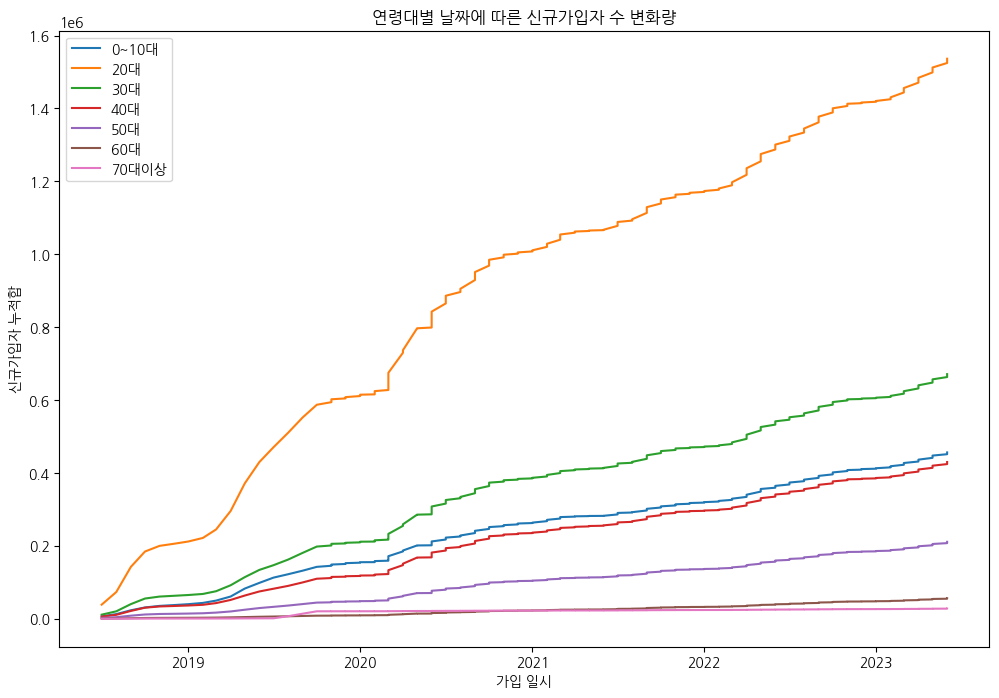

In [40]:
data = "따릉이_신규가입자_데이터.csv"
df = pd.read_csv(data)
df = df[df['연령대코드'] != '기타']
df['가입일시'] = pd.to_datetime(df['가입일시'], format='%Y-%m')
df['연령대코드'] = df['연령대코드'].replace({'~10대': '0~10대'})
df['신규가입자수'] = df['신규가입자수'].str.replace(',', '').astype(int)

plt.figure(figsize=(12, 8))

for age_group, group_df in df.groupby('연령대코드'):
    group_df = group_df.sort_values(by='가입일시')
    group_df['신규가입자 누적합'] = group_df['신규가입자수'].cumsum()

    plt.plot(group_df['가입일시'], group_df['신규가입자 누적합'], label=f'{age_group}')

plt.xlabel('가입 일시')
plt.ylabel('신규가입자 누적합')
plt.title('연령대별 날짜에 따른 신규가입자 수 변화량')
plt.legend()
plt.show()